In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/content/winequality-red.csv");

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

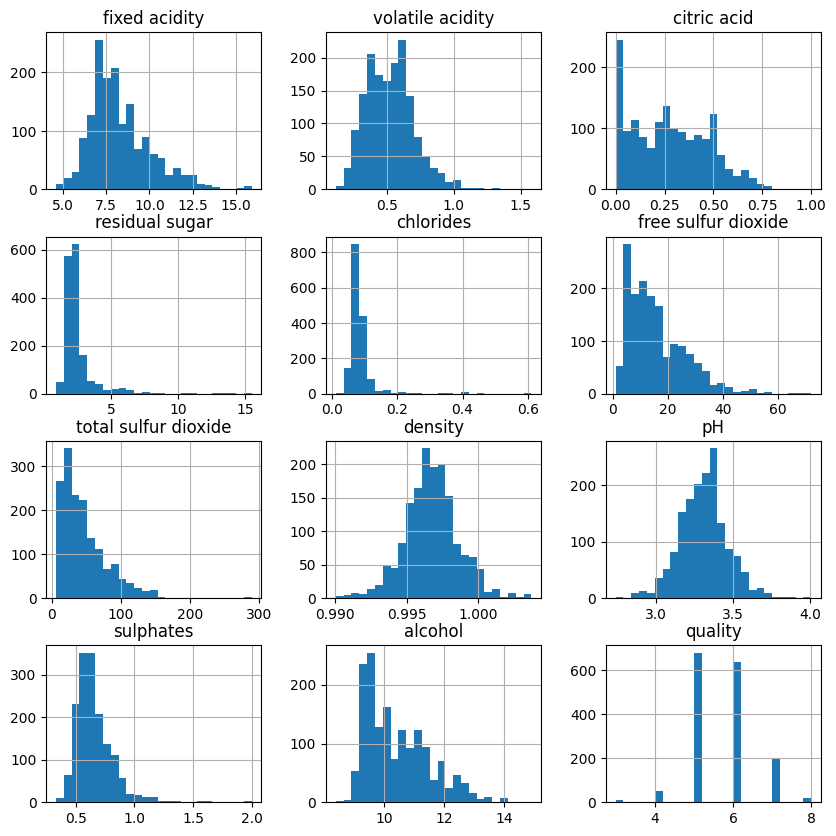

In [4]:
df.hist(bins=25, figsize=(10,10))
plt.show

Handling Outliers

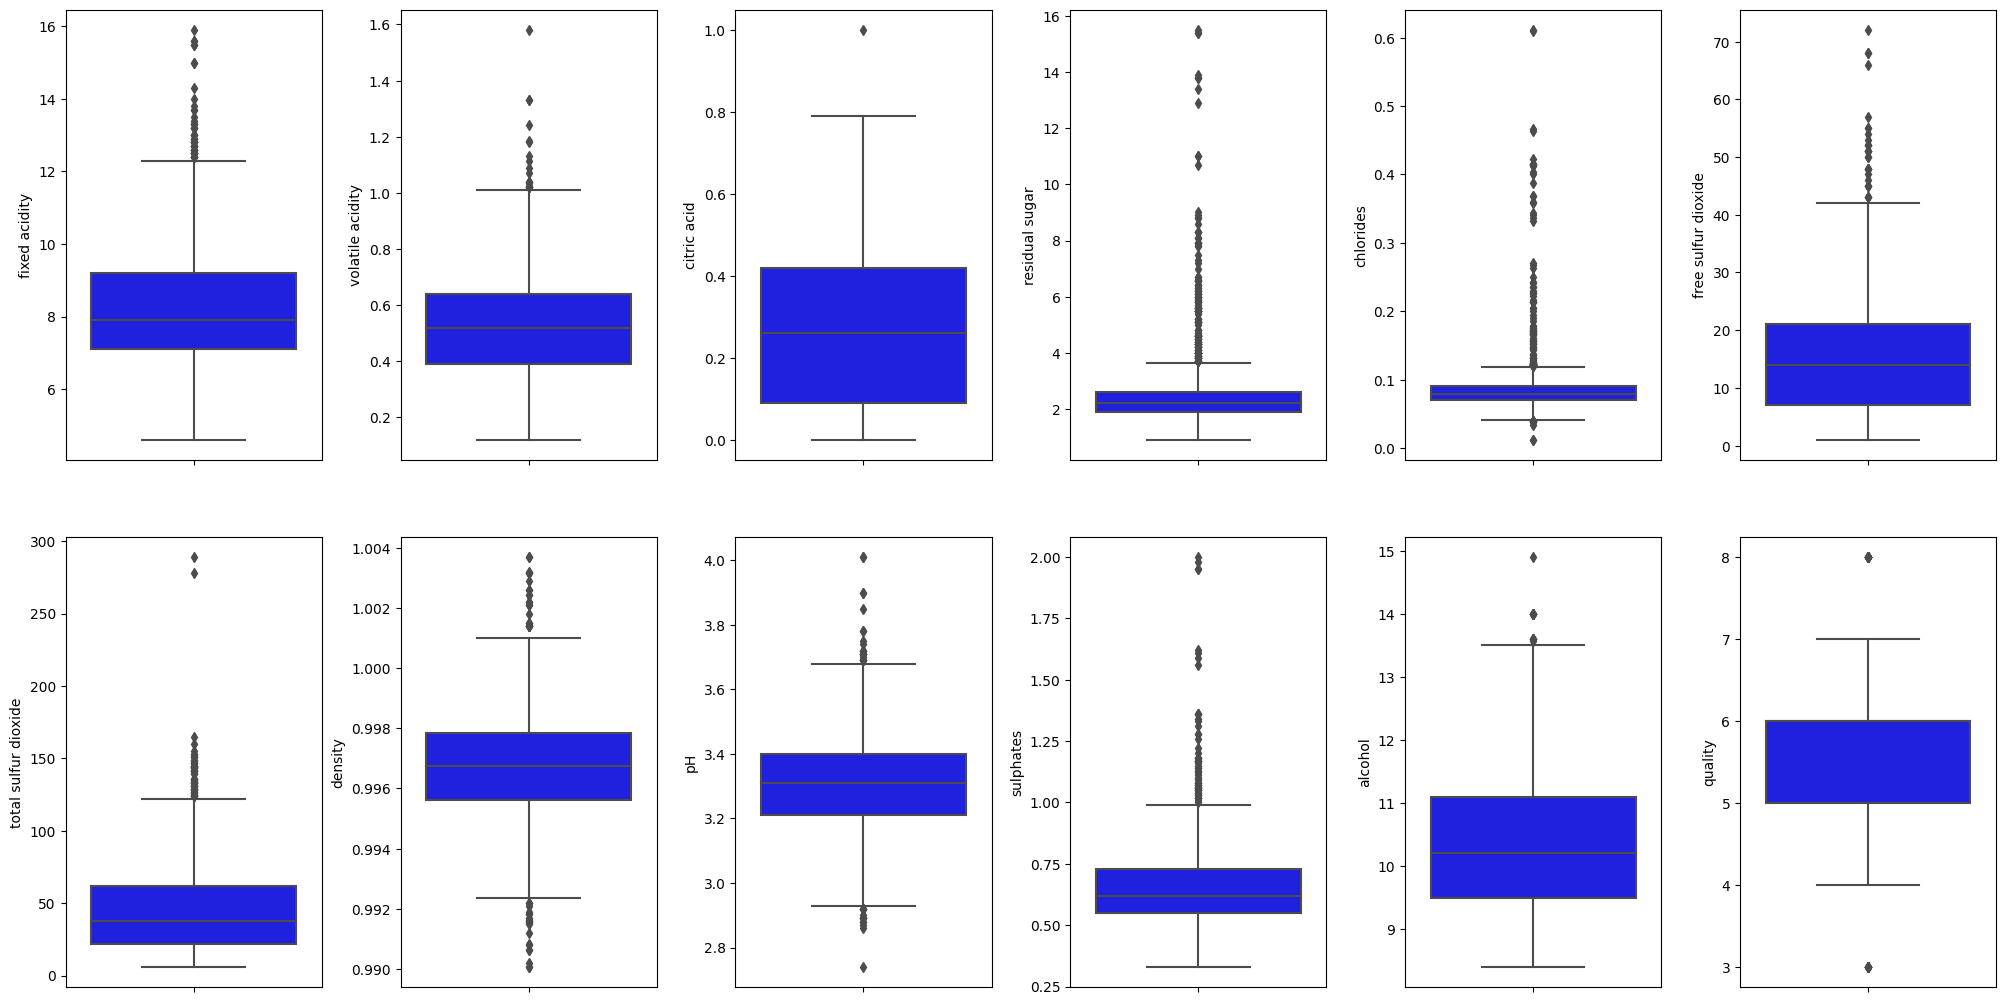

In [5]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sb.boxplot(y=col, data=df, color='b', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [6]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr)
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:
                    df[col][i] = upper_bound[col]

        for col in df.columns:
            df1[col] = df[col]

        return(df1)


In [7]:
df = mod_outlier(df)

<ipython-input-6-e090314e596a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = upper_bound[col]
<ipython-input-6-e090314e596a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = lower_bound[col]


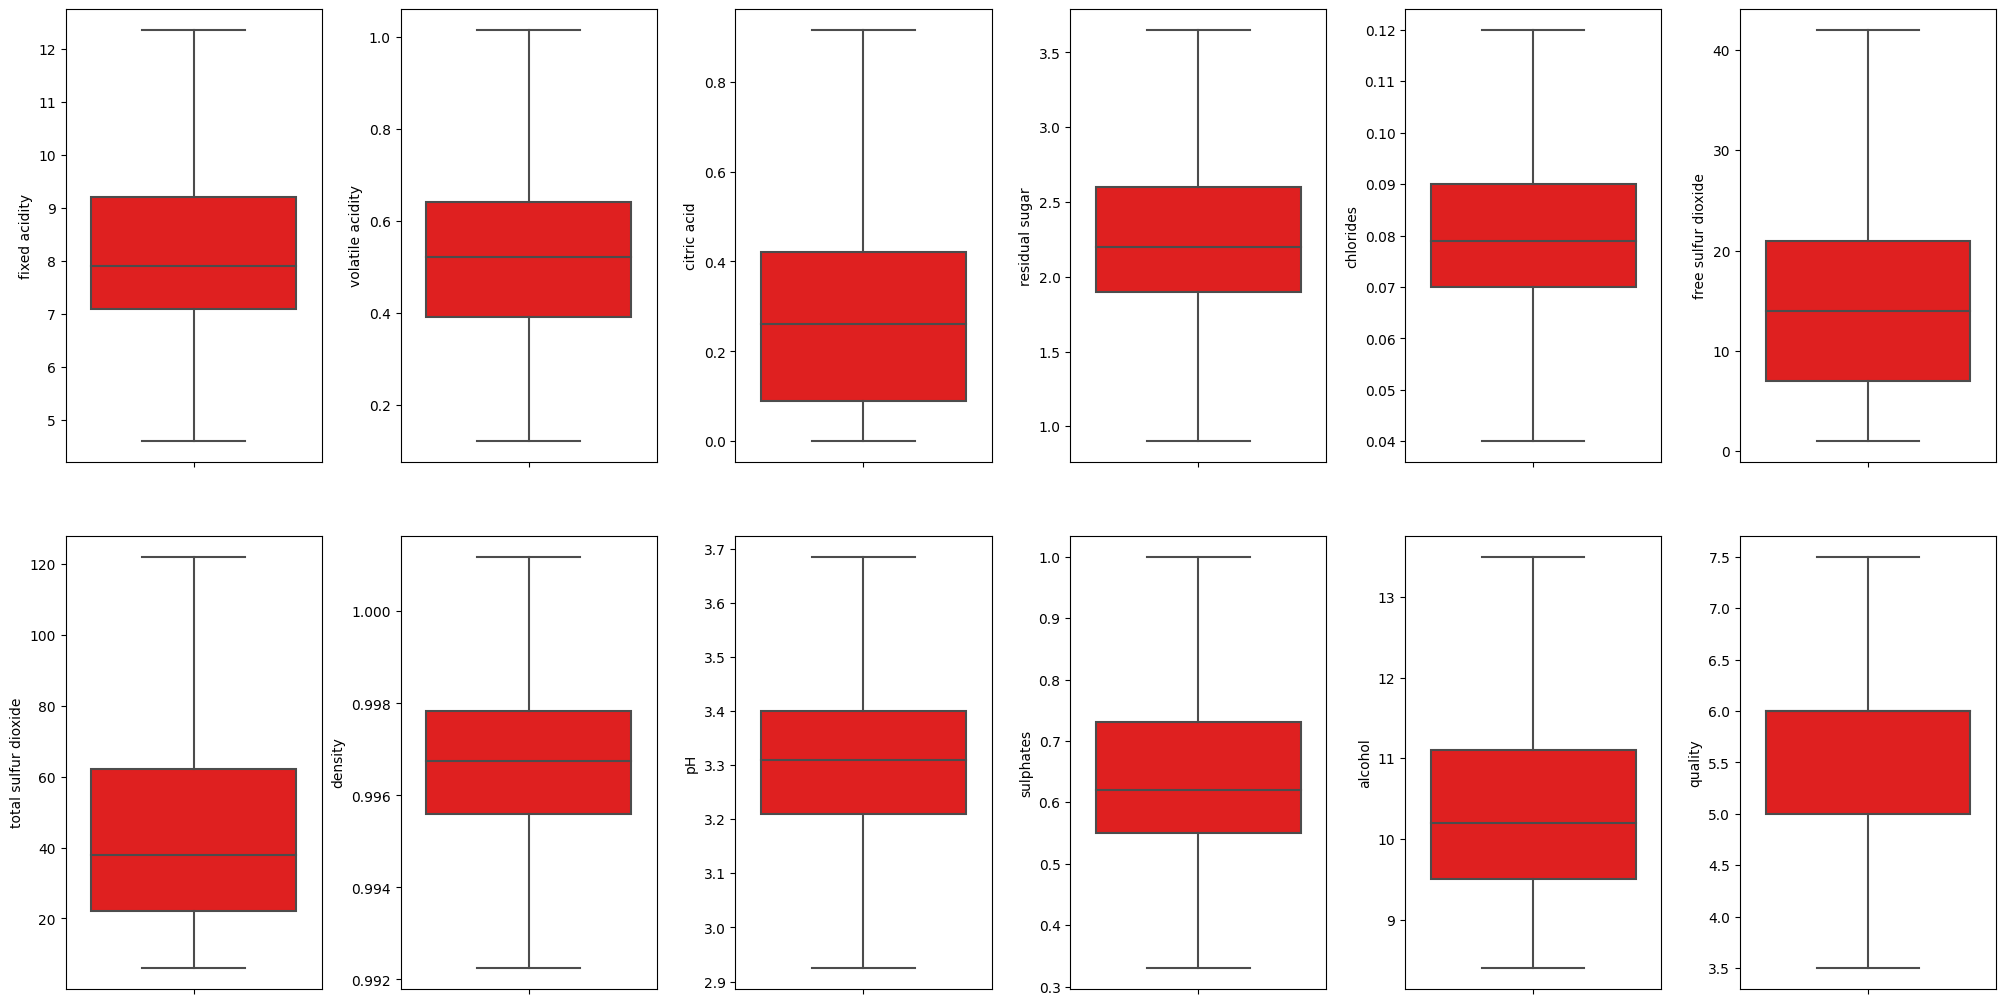

In [8]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sb.boxplot(y=col, data=df, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

1. Creation of a new column


In [9]:
df['Good_Quality'] = df['quality'] >= 7
df['Good_Quality'] = df['Good_Quality'].astype(int)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Good_Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0


In [11]:
# Dropping the 'quality' column
df = df.drop('quality', axis=1)

2. Data Preprocessing

In [12]:
df.shape

(1599, 12)

In [13]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Good_Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.290901,0.526429,0.270922,2.322358,0.081194,15.689181,45.714822,0.996742,3.310353,0.649831,10.419627,0.135710
std,1.655860,0.174045,0.194614,0.609493,0.017822,9.837494,30.374029,0.001806,0.149851,0.137086,1.054808,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.040000,1.000000,6.000000,0.992248,2.925000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,12.350000,1.015000,0.915000,3.650000,0.120000,42.000000,122.000000,1.001187,3.685000,1.000000,13.500000,1.000000


In [14]:
df.isna().sum()
# No null values present in the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Good_Quality            0
dtype: int64

In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Good_Quality'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Good_Quality          1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Correlation

<Axes: title={'center': 'Correlation Matrix'}>

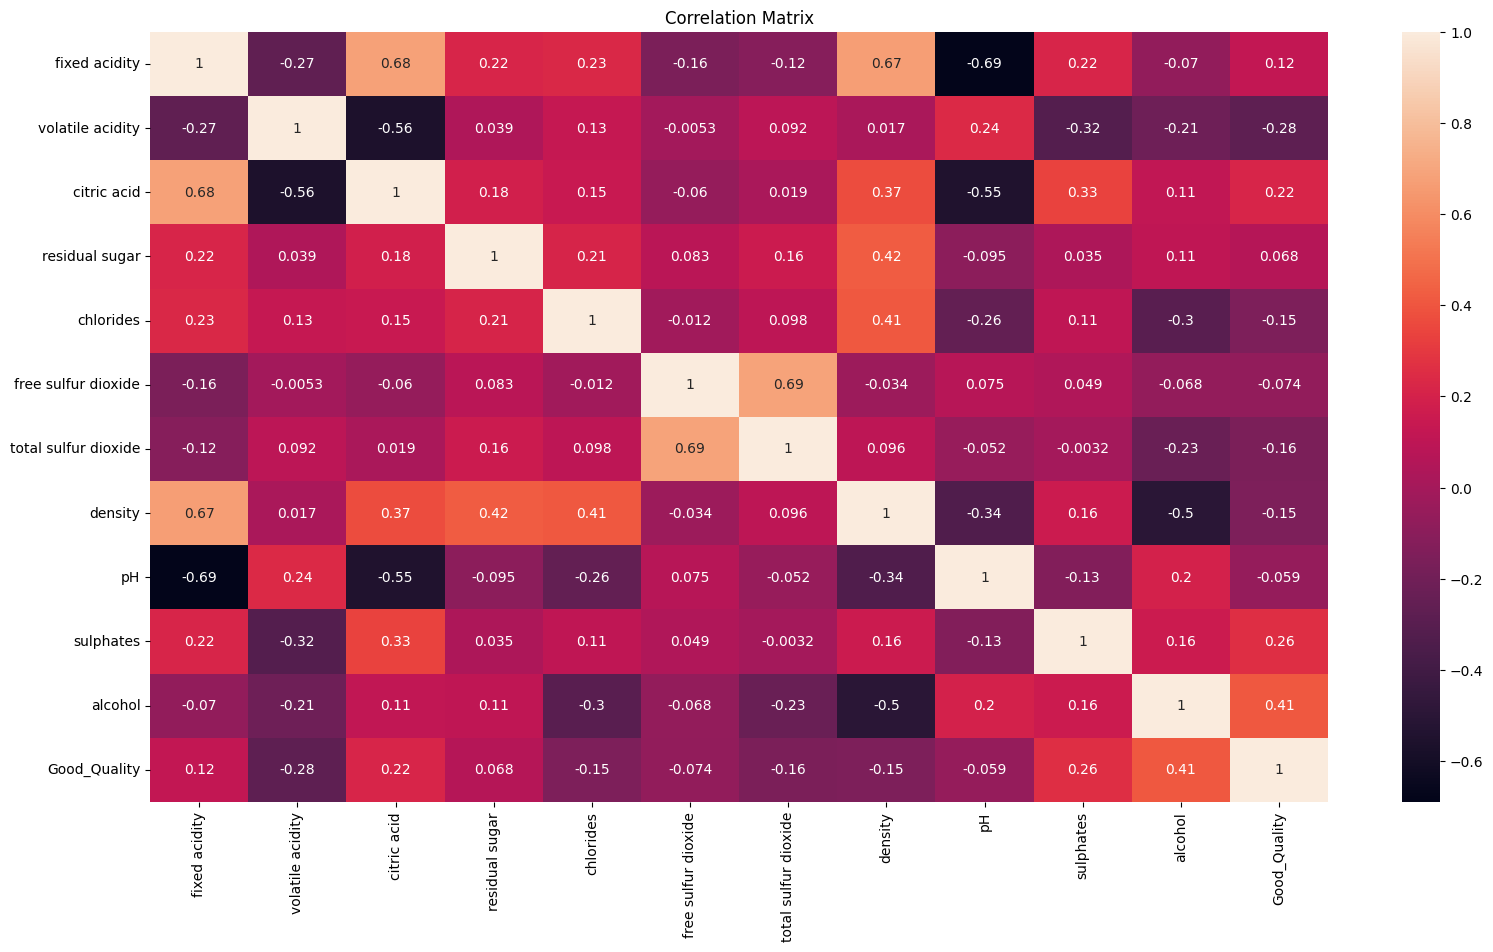

In [17]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='white')
plt.title("Correlation Matrix")
sb.heatmap(df.corr(),annot=True)

Insights from the above figure:

*   Alcohol is positively correlated with the quality of the red wine.
*   Citric Acid and Density hava a strong correlation with Fixed acidity.




In [18]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        correlation = df.corr().iloc[a,b]
        if a!=b and abs(correlation) > 0.67:
            name = df.corr().columns[a]
            print(name)


citric acid
total sulfur dioxide
pH


In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Good_Quality'],
      dtype='object')

In [20]:
# Dropping the above three columns
df.drop(['total sulfur dioxide', 'pH', 'citric acid'], axis=1, inplace=True)


In [21]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'density', 'sulphates', 'alcohol',
       'Good_Quality'],
      dtype='object')

In [22]:
df.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,density,sulphates,alcohol,Good_Quality
0,7.4,0.70,1.9,0.076,11.0,0.9978,0.56,9.4,0
1,7.8,0.88,2.6,0.098,25.0,0.9968,0.68,9.8,0
2,7.8,0.76,2.3,0.092,15.0,0.9970,0.65,9.8,0
3,11.2,0.28,1.9,0.075,17.0,0.9980,0.58,9.8,0
4,7.4,0.70,1.9,0.076,11.0,0.9978,0.56,9.4,0


In [23]:
x = df.iloc[:,:8]
y = df.iloc[:,8]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1599, 8)
(1599,)


In [24]:
x_train_ ,x_test_ ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

Normalization

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train_)
x_test = scaler.fit_transform(x_test_)

Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score

In [27]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print("Training accuracy :", lr.score(x_train, y_train))
print("Testing accuracy :", lr.score(x_test, y_test))

print(classification_report(y_test, y_pred_lr))

print(confusion_matrix(y_test, y_pred_lr))

Training accuracy : 0.8819390148553558
Testing accuracy : 0.884375
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       272
           1       0.79      0.31      0.45        48

    accuracy                           0.88       320
   macro avg       0.84      0.65      0.69       320
weighted avg       0.88      0.88      0.86       320

[[268   4]
 [ 33  15]]


Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

In [29]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
f1_rf = f1_score(y_test, y_pred_rf)

print("Mean squared error of the model is: ", mse)
print("Root mean squared error of the model is: ", rmse)

print("Training accuracy :", rf.score(x_train, y_train))
print("Testing accuracy :", rf.score(x_test, y_test))
print("F1 score :", f1_rf)

print(classification_report(y_test, y_pred_rf))

Mean squared error of the model is:  0.11875
Root mean squared error of the model is:  0.3446012188022555
Training accuracy : 1.0
Testing accuracy : 0.88125
F1 score : 0.48648648648648646
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       272
           1       0.69      0.38      0.49        48

    accuracy                           0.88       320
   macro avg       0.80      0.67      0.71       320
weighted avg       0.87      0.88      0.87       320



K-Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [31]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)

f1_knn = f1_score(y_test, y_pred_knn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_knn)

print(classification_report(y_test, y_pred_knn))

Accuracy: 0.890625
Precision: 0.6511627906976745
Recall: 0.5833333333333334
F1 score: 0.6153846153846155
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       272
           1       0.65      0.58      0.62        48

    accuracy                           0.89       320
   macro avg       0.79      0.76      0.78       320
weighted avg       0.89      0.89      0.89       320



Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [33]:
dtc = DecisionTreeClassifier(random_state=90)
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)

accuracy = accuracy_score(y_pred_dtc, y_test)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred_dtc))

Accuracy: 0.84375
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       272
           1       0.48      0.44      0.46        48

    accuracy                           0.84       320
   macro avg       0.69      0.68      0.68       320
weighted avg       0.84      0.84      0.84       320



4. Evaluation

In [34]:
def evaluate_model(model_name, y_train, y_pred):
    acc_score = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    print(f"{model_name} - Accuracy: {acc_score:.4f}, F1 Score: {f1:.4f}")

In [35]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn)
evaluate_model("Decision Tree Classifier", y_test, y_pred_dtc)
evaluate_model("Random Forest Classifier", y_test, y_pred_rf)

Logistic Regression - Accuracy: 0.8844, F1 Score: 0.4478
K-Nearest Neighbors - Accuracy: 0.8906, F1 Score: 0.6154
Decision Tree Classifier - Accuracy: 0.8438, F1 Score: 0.4565
Random Forest Classifier - Accuracy: 0.8812, F1 Score: 0.4865


Logistic Regression from scratch

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score


In [37]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(model)

            # Update weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(model)
        predictions_cls = [1 if i > 0.5 else 0 for i in predictions]

        return np.array(predictions_cls)


In [40]:
model = LogisticRegression(learning_rate=0.0001, n_iters=1000)
model.fit(x_train, y_train)


predictions = model.predict(x_test)

cm = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print("Confusion Matrix:\n", cm)
print("Test accuracy: {0:.3f}".format(accuracy))


Confusion Matrix:
 [[272   0]
 [ 48   0]]
Test accuracy: 0.850
